# Case - Titanic

This notebook covers the data analysis case using Ttanic survival data (csv file) available on GitHub. Data is read into Pandas trough its link. Key points:
- **data.info()** shows that number of rows is 891, while some variables (like Age or Cabin) have less non-null values. This tells us that those variables (columns) have missing values (empty cells).
- missing values for column **Cabin** are many, thus we drop the column, for the rest we keep the columns, but drop all the rows with missing values using **dropna()** function.
- some variables are numeric (int or float) while others are strings (called object in Pandas in general). We use **select_dtypes()** function to include or exclude the appropriate object types. More specifically, we create separate dataframes for objects and non-objetcs (numerics).
- **value_counts()** is used to count frequency of each unique value in a given column (Survived in our case).
- **unique()** is used to get the unique values of a column only.
- **np.where()** works like the IF formula in MS Excel, we used it to converts female=0 and male=1.
- another method for conversion is to say that column has the "category" type and create codes for categories (astype("category").cat.codes). Note: no order for categories is given, so we do not know whether male=0 or =1.
- **get_dummies()** from pandas was used to create separate columns for each of the values of a given variable (Embarked in our case) with 0 or 1 values.
- we plot distribution of values using seaborn's distplot() function.


In [2]:
#importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading data
data = pd.read_csv("https://raw.githubusercontent.com/HrantDavtyan/Data_Scraping/master/Week%202/Datasets/Titanic.csv")

In [5]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# we have missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#Task 1 - drop Cabin
#Task 2 - drop NA
data = data.drop(["Cabin"],axis=1)

In [9]:
data = data.dropna()

In [10]:
# no missing value anymore
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [11]:
#separate numeric columns and object columns
data_obj = data.select_dtypes(include=["object"])
data_num = data.select_dtypes(exclude=["object"])

In [12]:
data_num.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
885,886,0,3,39.0,0,5,29.125
886,887,0,2,27.0,0,0,13.000
887,888,1,1,19.0,0,0,30.000
889,890,1,1,26.0,0,0,30.000
890,891,0,3,32.0,0,0,7.750


In [13]:
# count number of survivors
data_num.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [14]:
len(data_num)

712

In [16]:
# calculate % of survivors
data_num.Survived.value_counts()/len(data_num)*100

0    59.550562
1    40.449438
Name: Survived, dtype: float64

In [18]:
#unique values of the Pclass column
data_num.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [19]:
data_num.SibSp.unique()

array([1, 0, 3, 4, 2, 5], dtype=int64)

In [21]:
data_num.Fare.describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

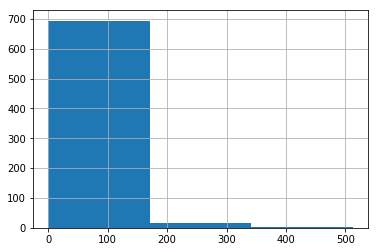

In [25]:
data_num.Fare.hist(bins=3)

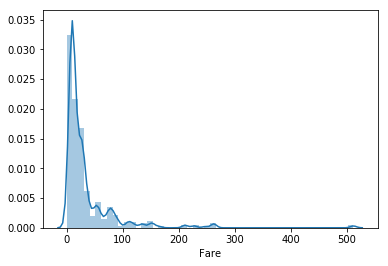

In [26]:
sns.distplot(data_num.Fare)

In [27]:
data_obj.tail(3)

,Name,Sex,Ticket,Embarked
887,"Graham, Miss. Margaret Edith",female,112053,S
889,"Behr, Mr. Karl Howell",male,111369,C
890,"Dooley, Mr. Patrick",male,370376,Q


In [28]:
data_obj.Sex.unique()

array(['male', 'female'], dtype=object)

In [29]:
data_obj.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [30]:
# convert male to 1, female to 0
data_obj.Sex = np.where(data_obj.Sex=="male",1,0)
data_obj.head(3)

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",1,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,C
2,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,S


In [31]:
# if we have not converted with np.where() above,
# we could also use approach below
data_obj.Sex = data_obj.Sex.astype("category").cat.codes

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
data_obj.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
#create additional columns for each value of Embarked
dummies = pd.get_dummies(data_obj.Embarked,prefix="Embarked")
data_obj = data_obj.join(dummies)
data_obj.tail(3)

,Name,Sex,Ticket,Embarked,Embarked_C,Embarked_Q,Embarked_S
887,"Graham, Miss. Margaret Edith",0,112053,S,0,0,1
889,"Behr, Mr. Karl Howell",1,111369,C,1,0,0
890,"Dooley, Mr. Patrick",1,370376,Q,0,1,0


In [36]:
data_full = data_num.join(data_obj)

In [37]:
data_full.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",1,A/5 21171,S,0,0,1
1,2,1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,C,1,0,0
2,3,1,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,S,0,0,1


In [38]:
# calculate the ratio of %male survived to %female survived
cond1 = data_full.Sex==1
cond2 = data_full.Sex==0

data_males = data_full[cond1]
males_survived = data_males.Survived.value_counts()[1]

data_females = data_full[cond2]
females_survived = data_females.Survived.value_counts()[1]

males_survived/females_survived

0.47692307692307695